### Importing the Libraries 

In [187]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
import tensorflow as tf 
import keras 
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import cv2

### Displaying  up the Path of the images 

In [188]:

def show_rand(x,dir='data/Fruit_category/apple'):
    if len(x)==30:
        f,ax=plt.subplots(6,5,figsize=(40,40))
        for i,file_name in enumerate(x):
            img=cv2.imread(os.path.join(dir,file_name))
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            ax[i//5][i%5].imshow(img,aspect='auto')
            ax[i//5][i%5].set_xticks([]); ax[i//5][i%5].set_yticks([])
            
        plt.show()

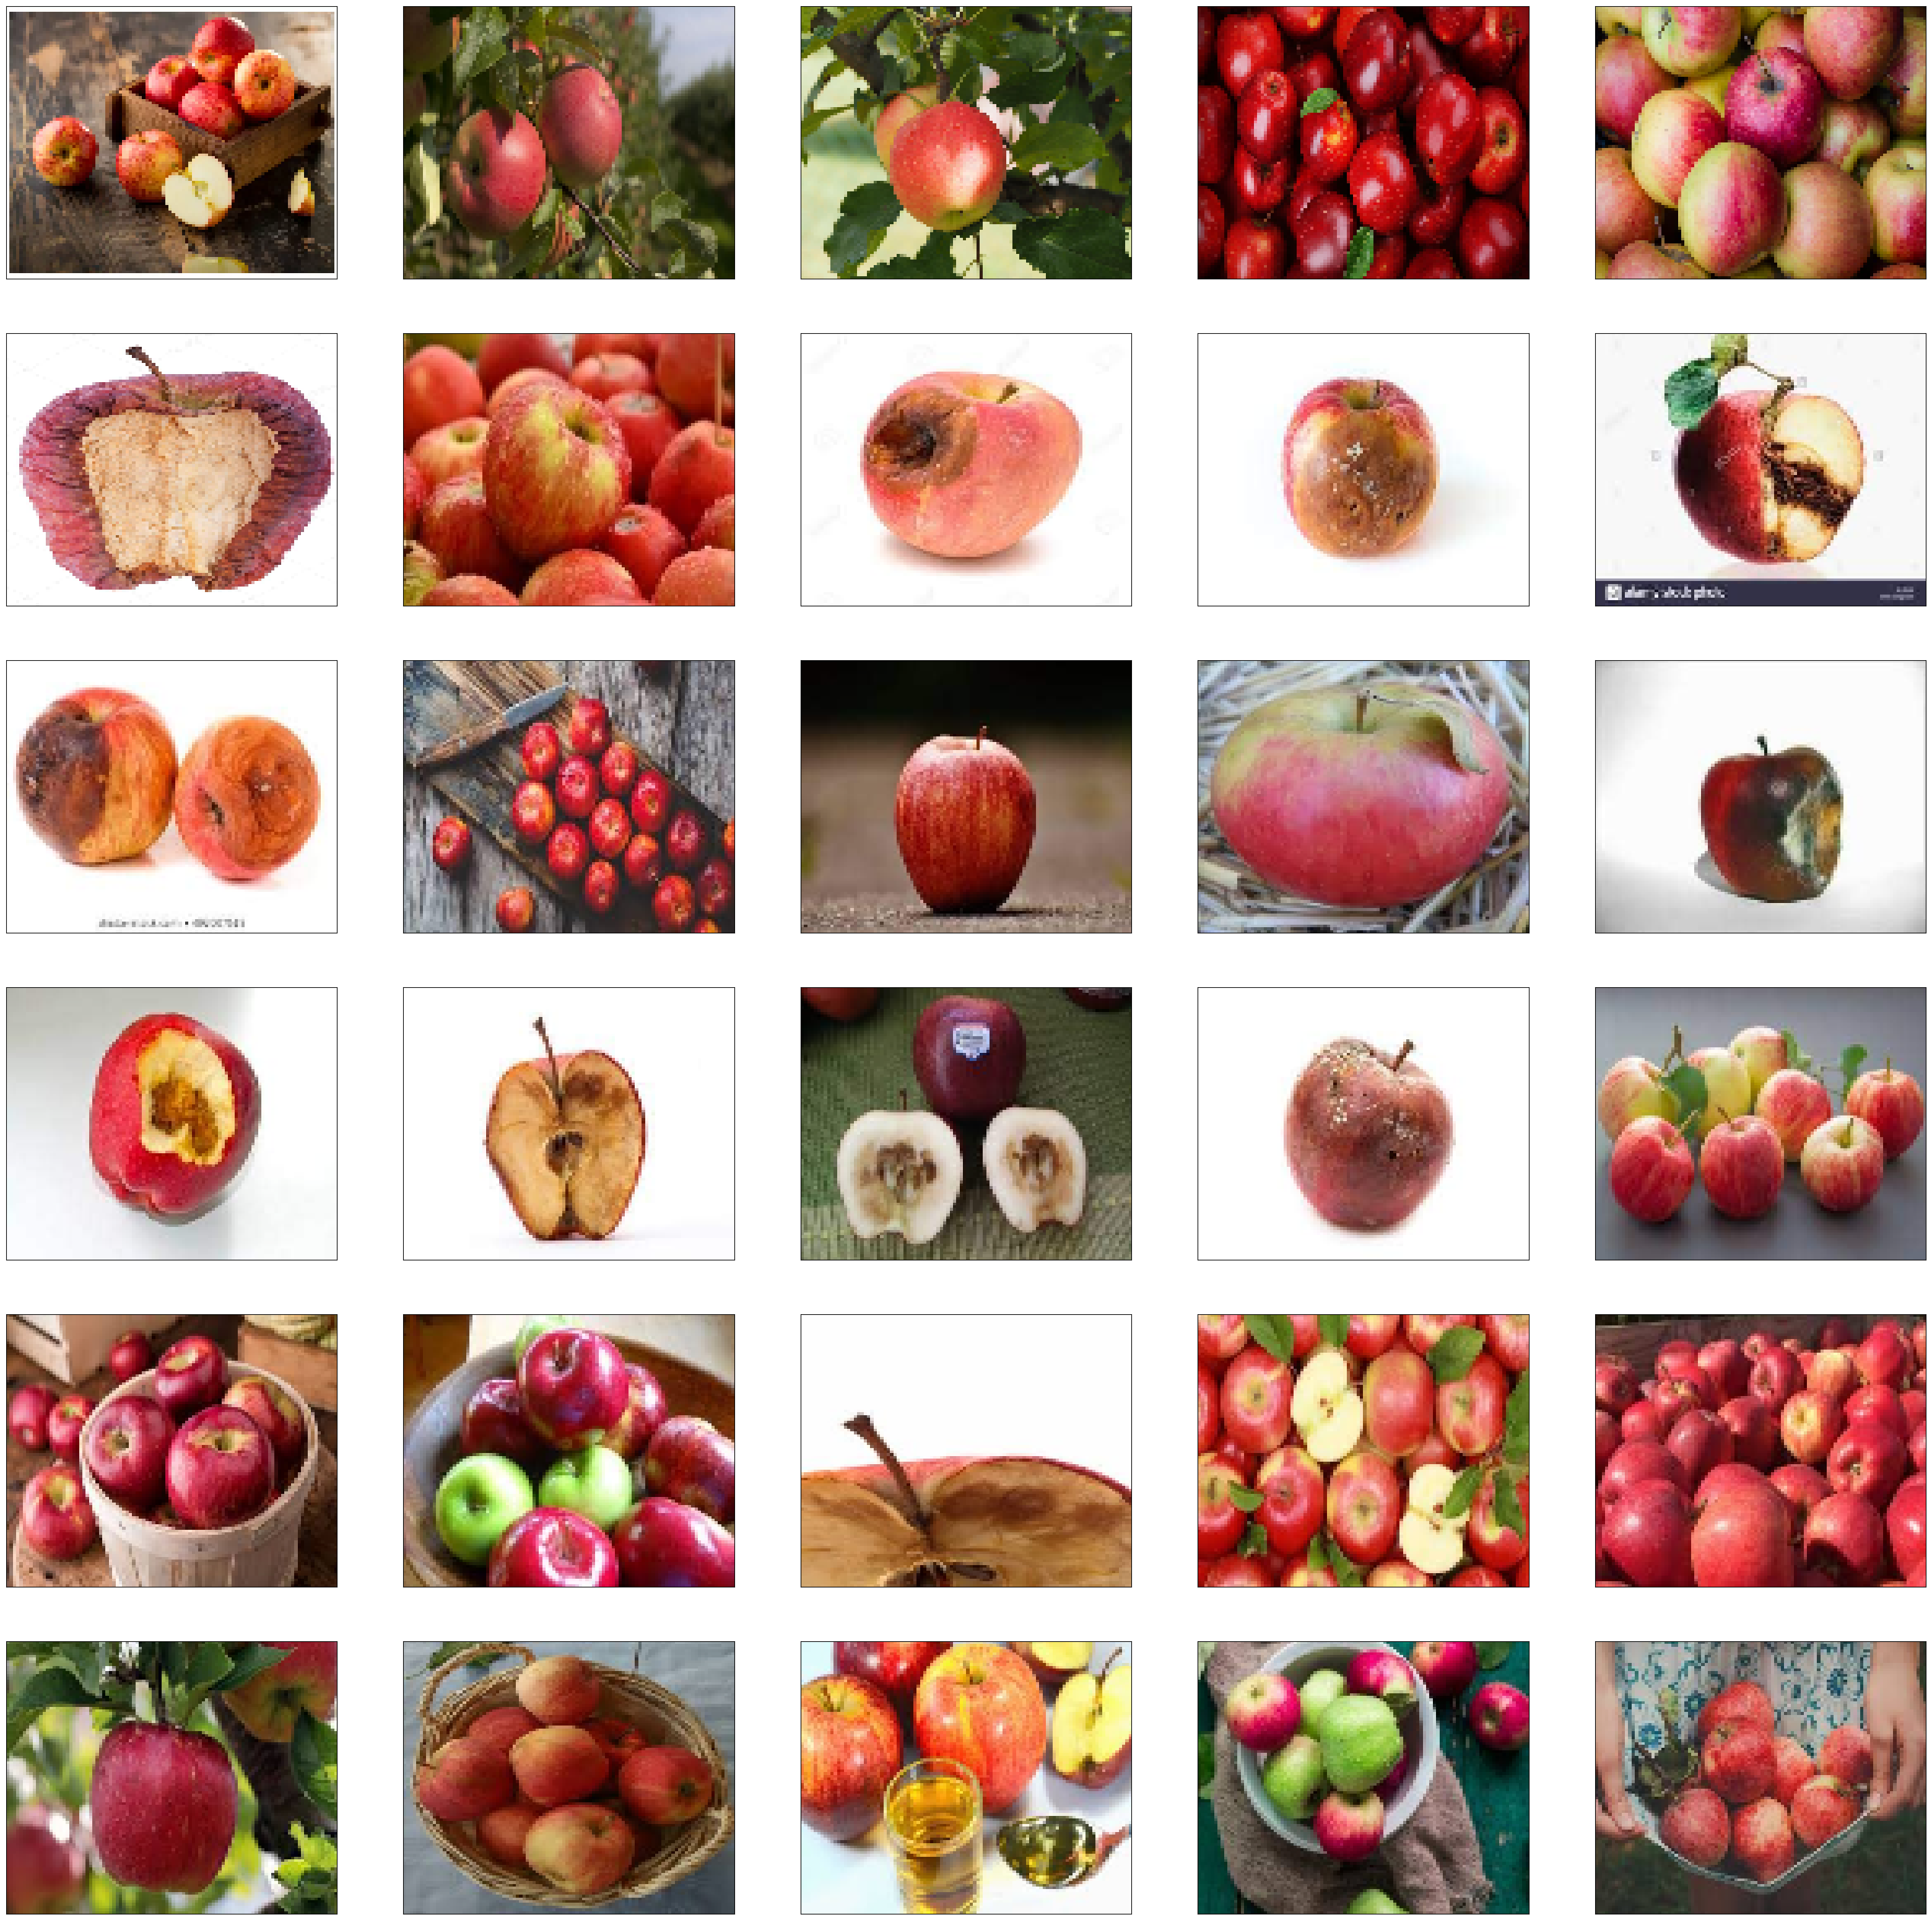

In [189]:
show_rand(os.listdir('data/Fruit_category/apple')[:30],dir='data/Fruit_category/apple')

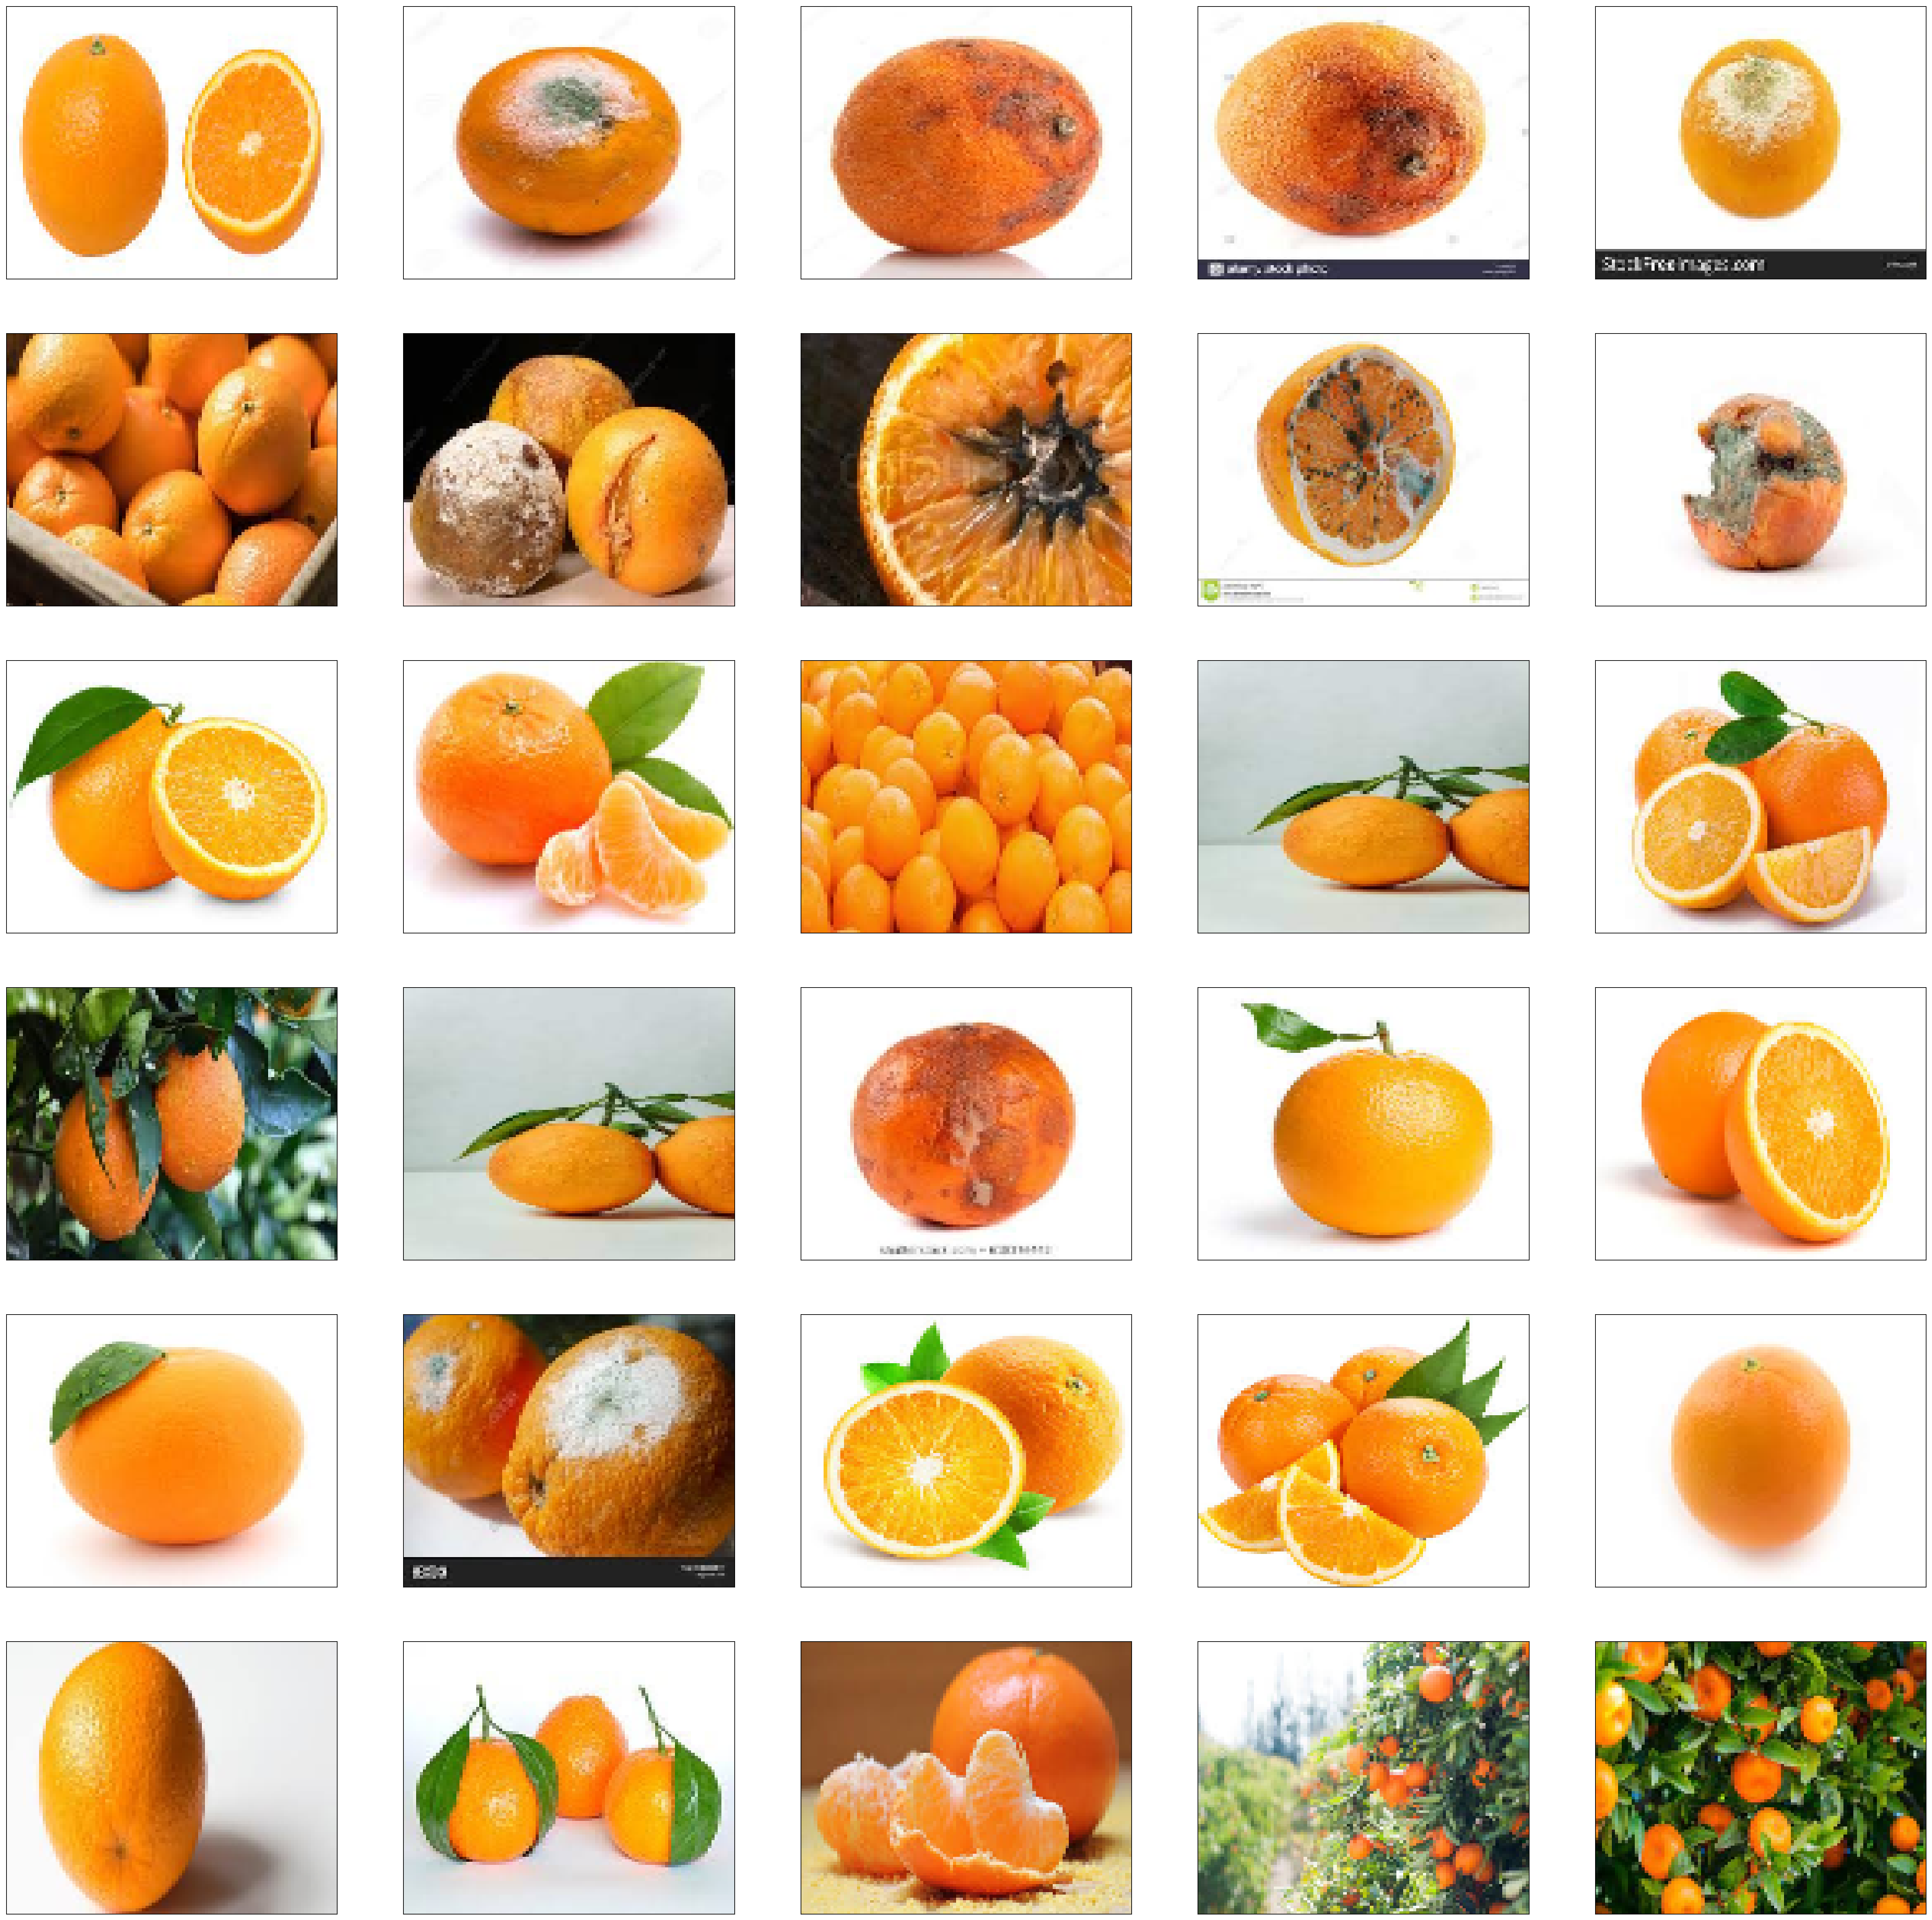

In [190]:
show_rand(os.listdir('data/Fruit_category/orange')[:30],dir='data/Fruit_category/orange')

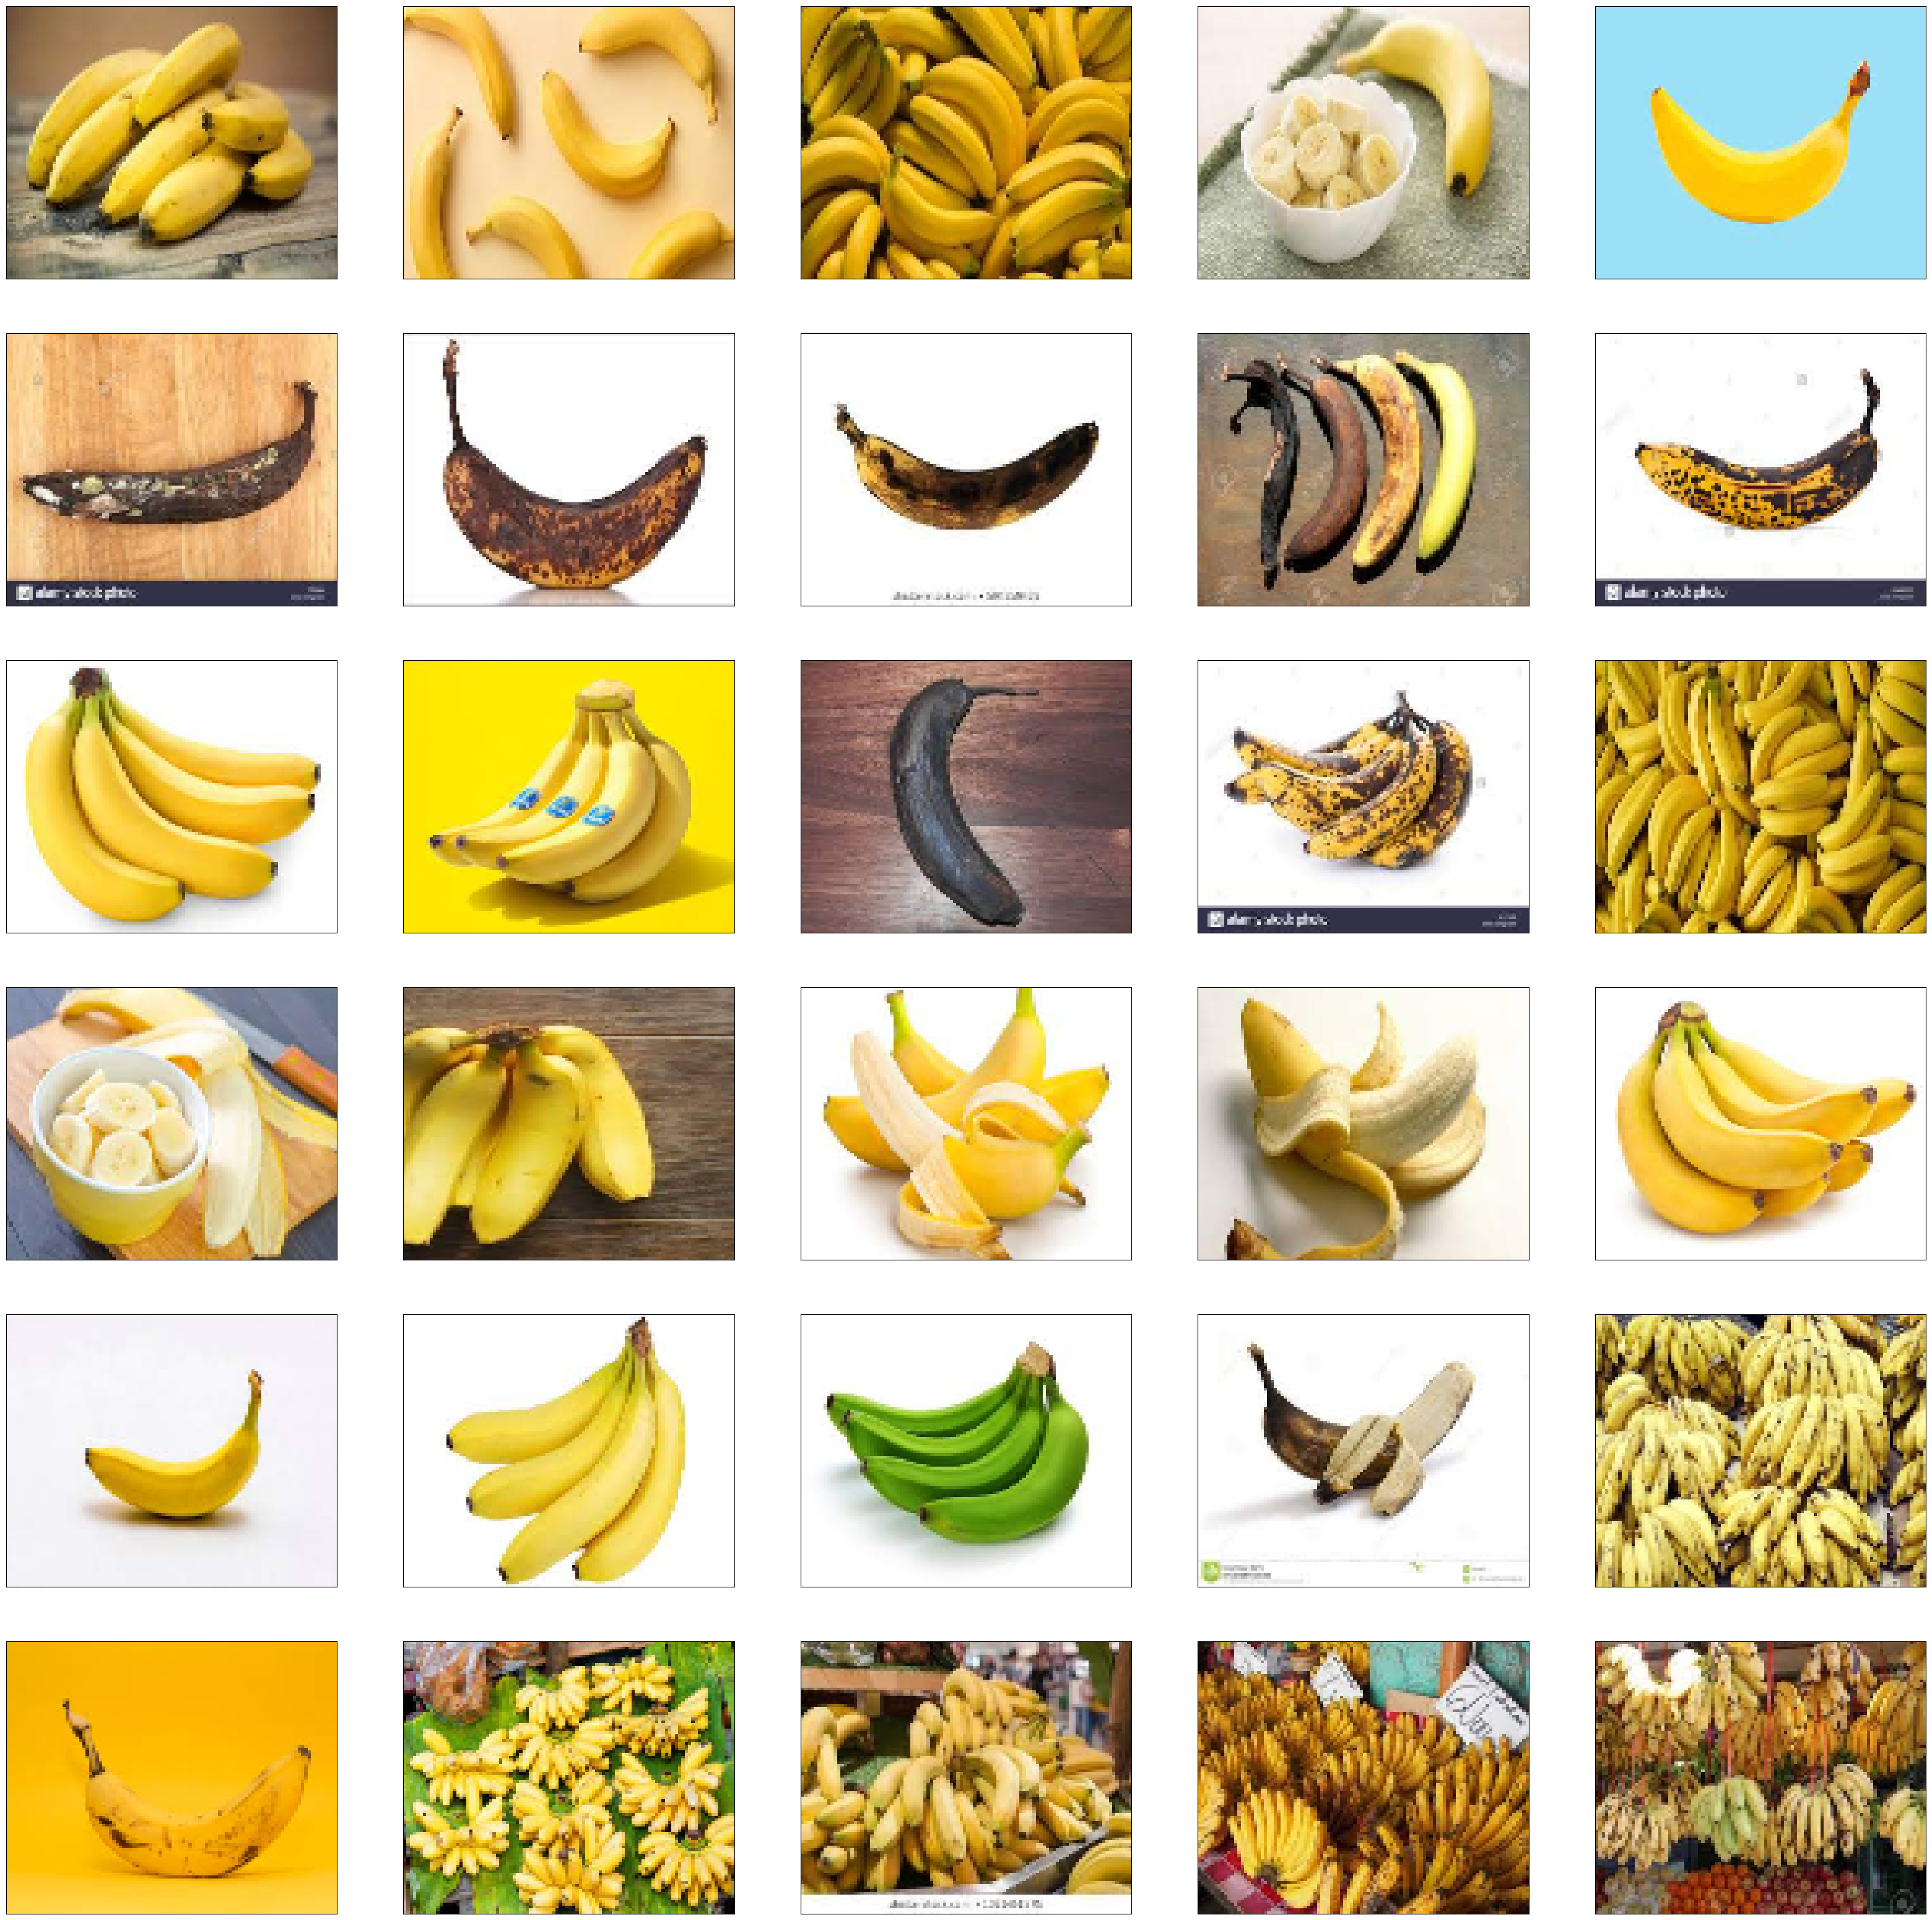

In [191]:
show_rand(os.listdir('data/Fruit_category/banana')[:30],dir='data/Fruit_category/banana')

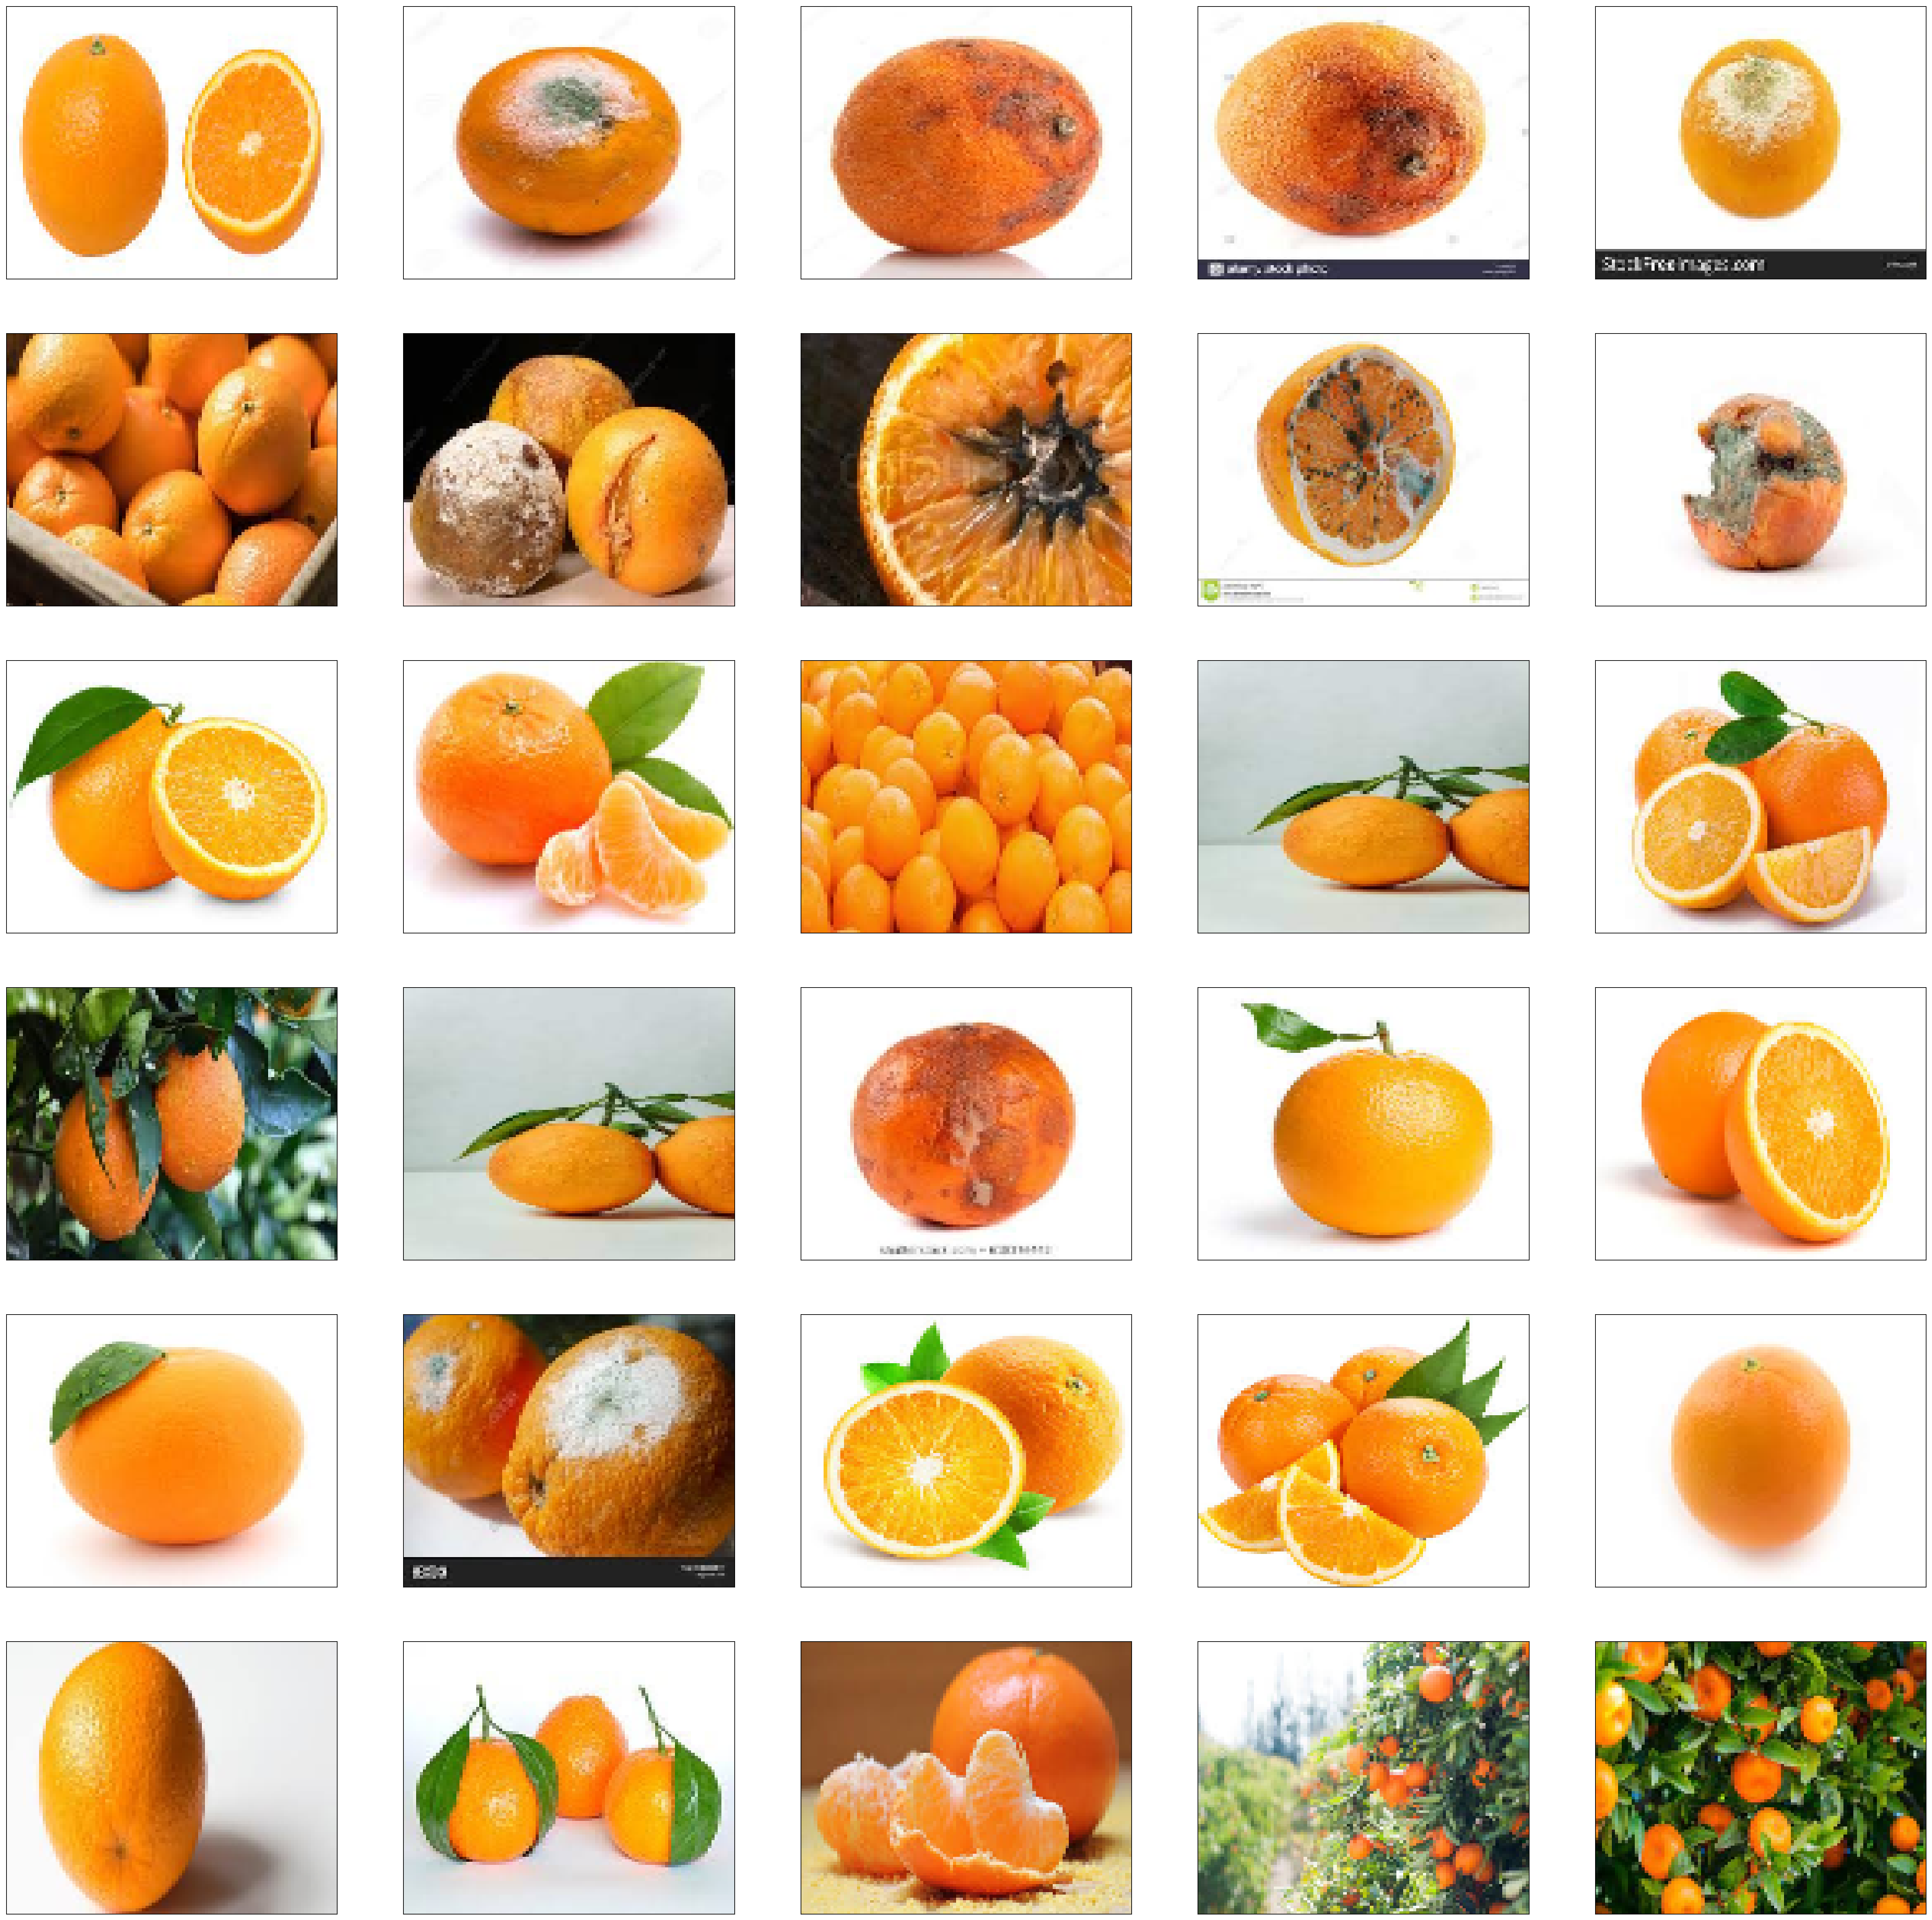

In [192]:
show_rand(os.listdir('data/Fruit_category/orange')[:30],dir='data/Fruit_category/orange')

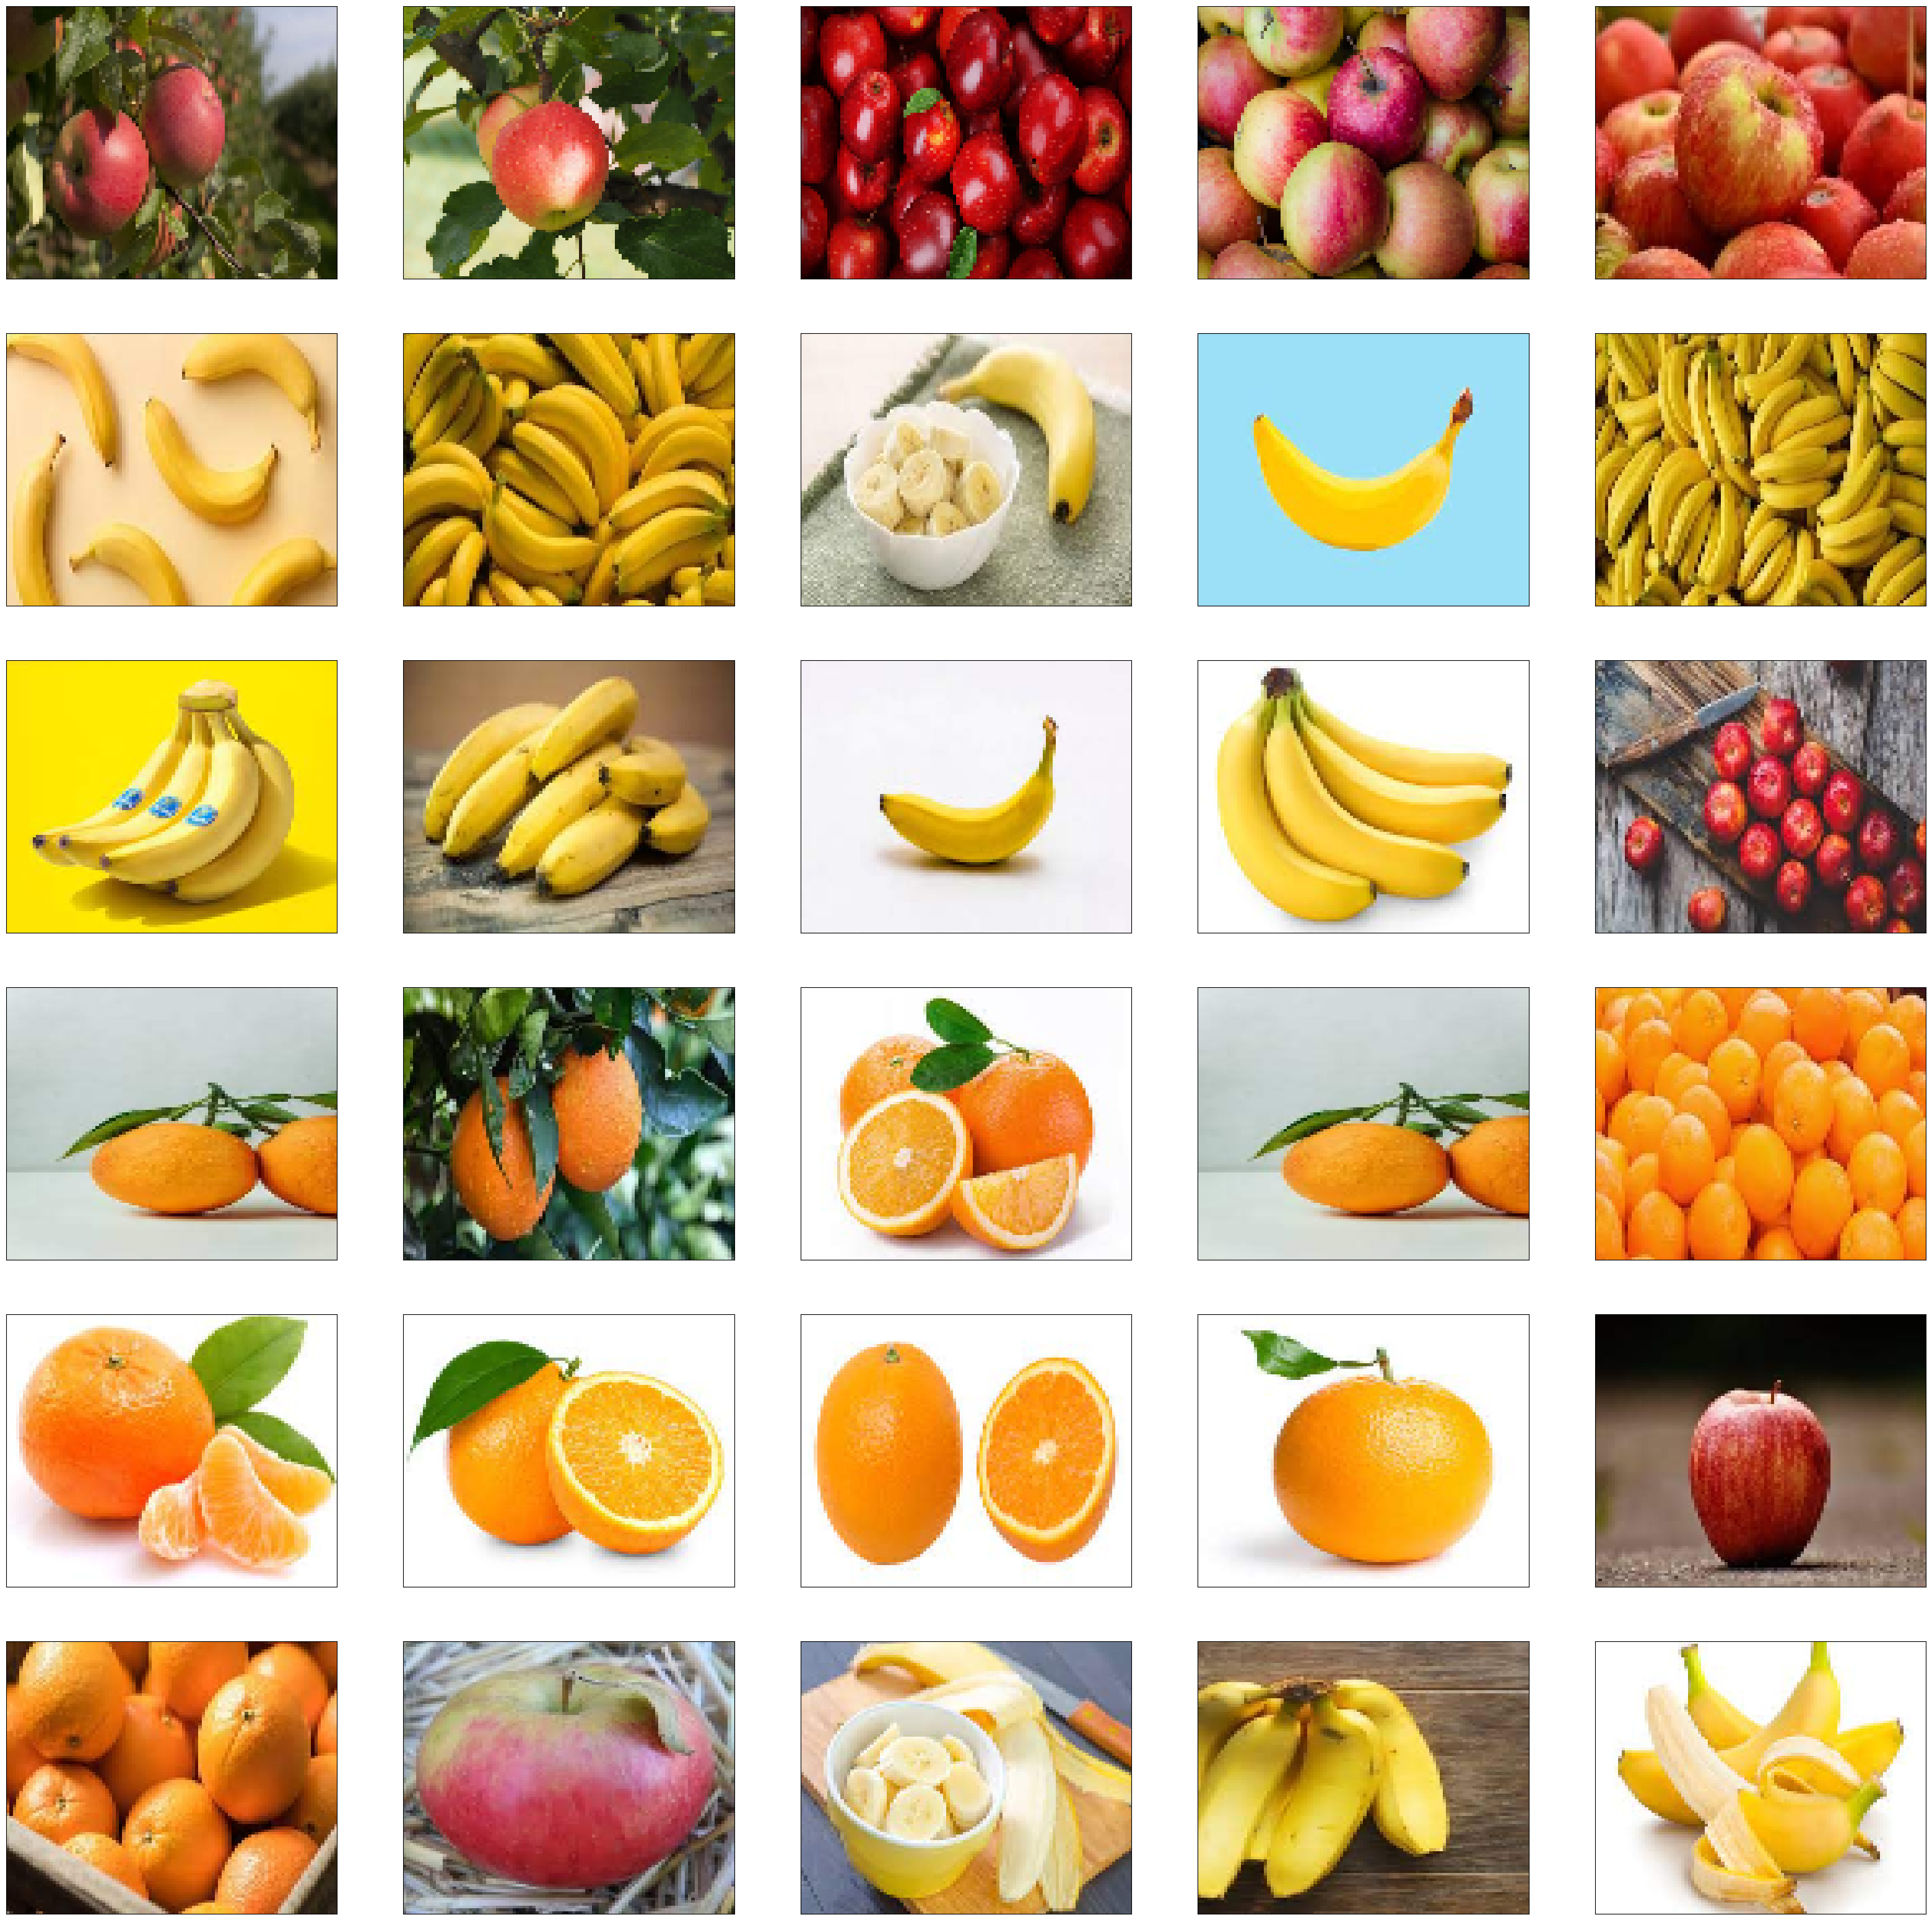

In [193]:
show_rand(os.listdir('data/quality/fresh')[:30],dir='data/quality/fresh')

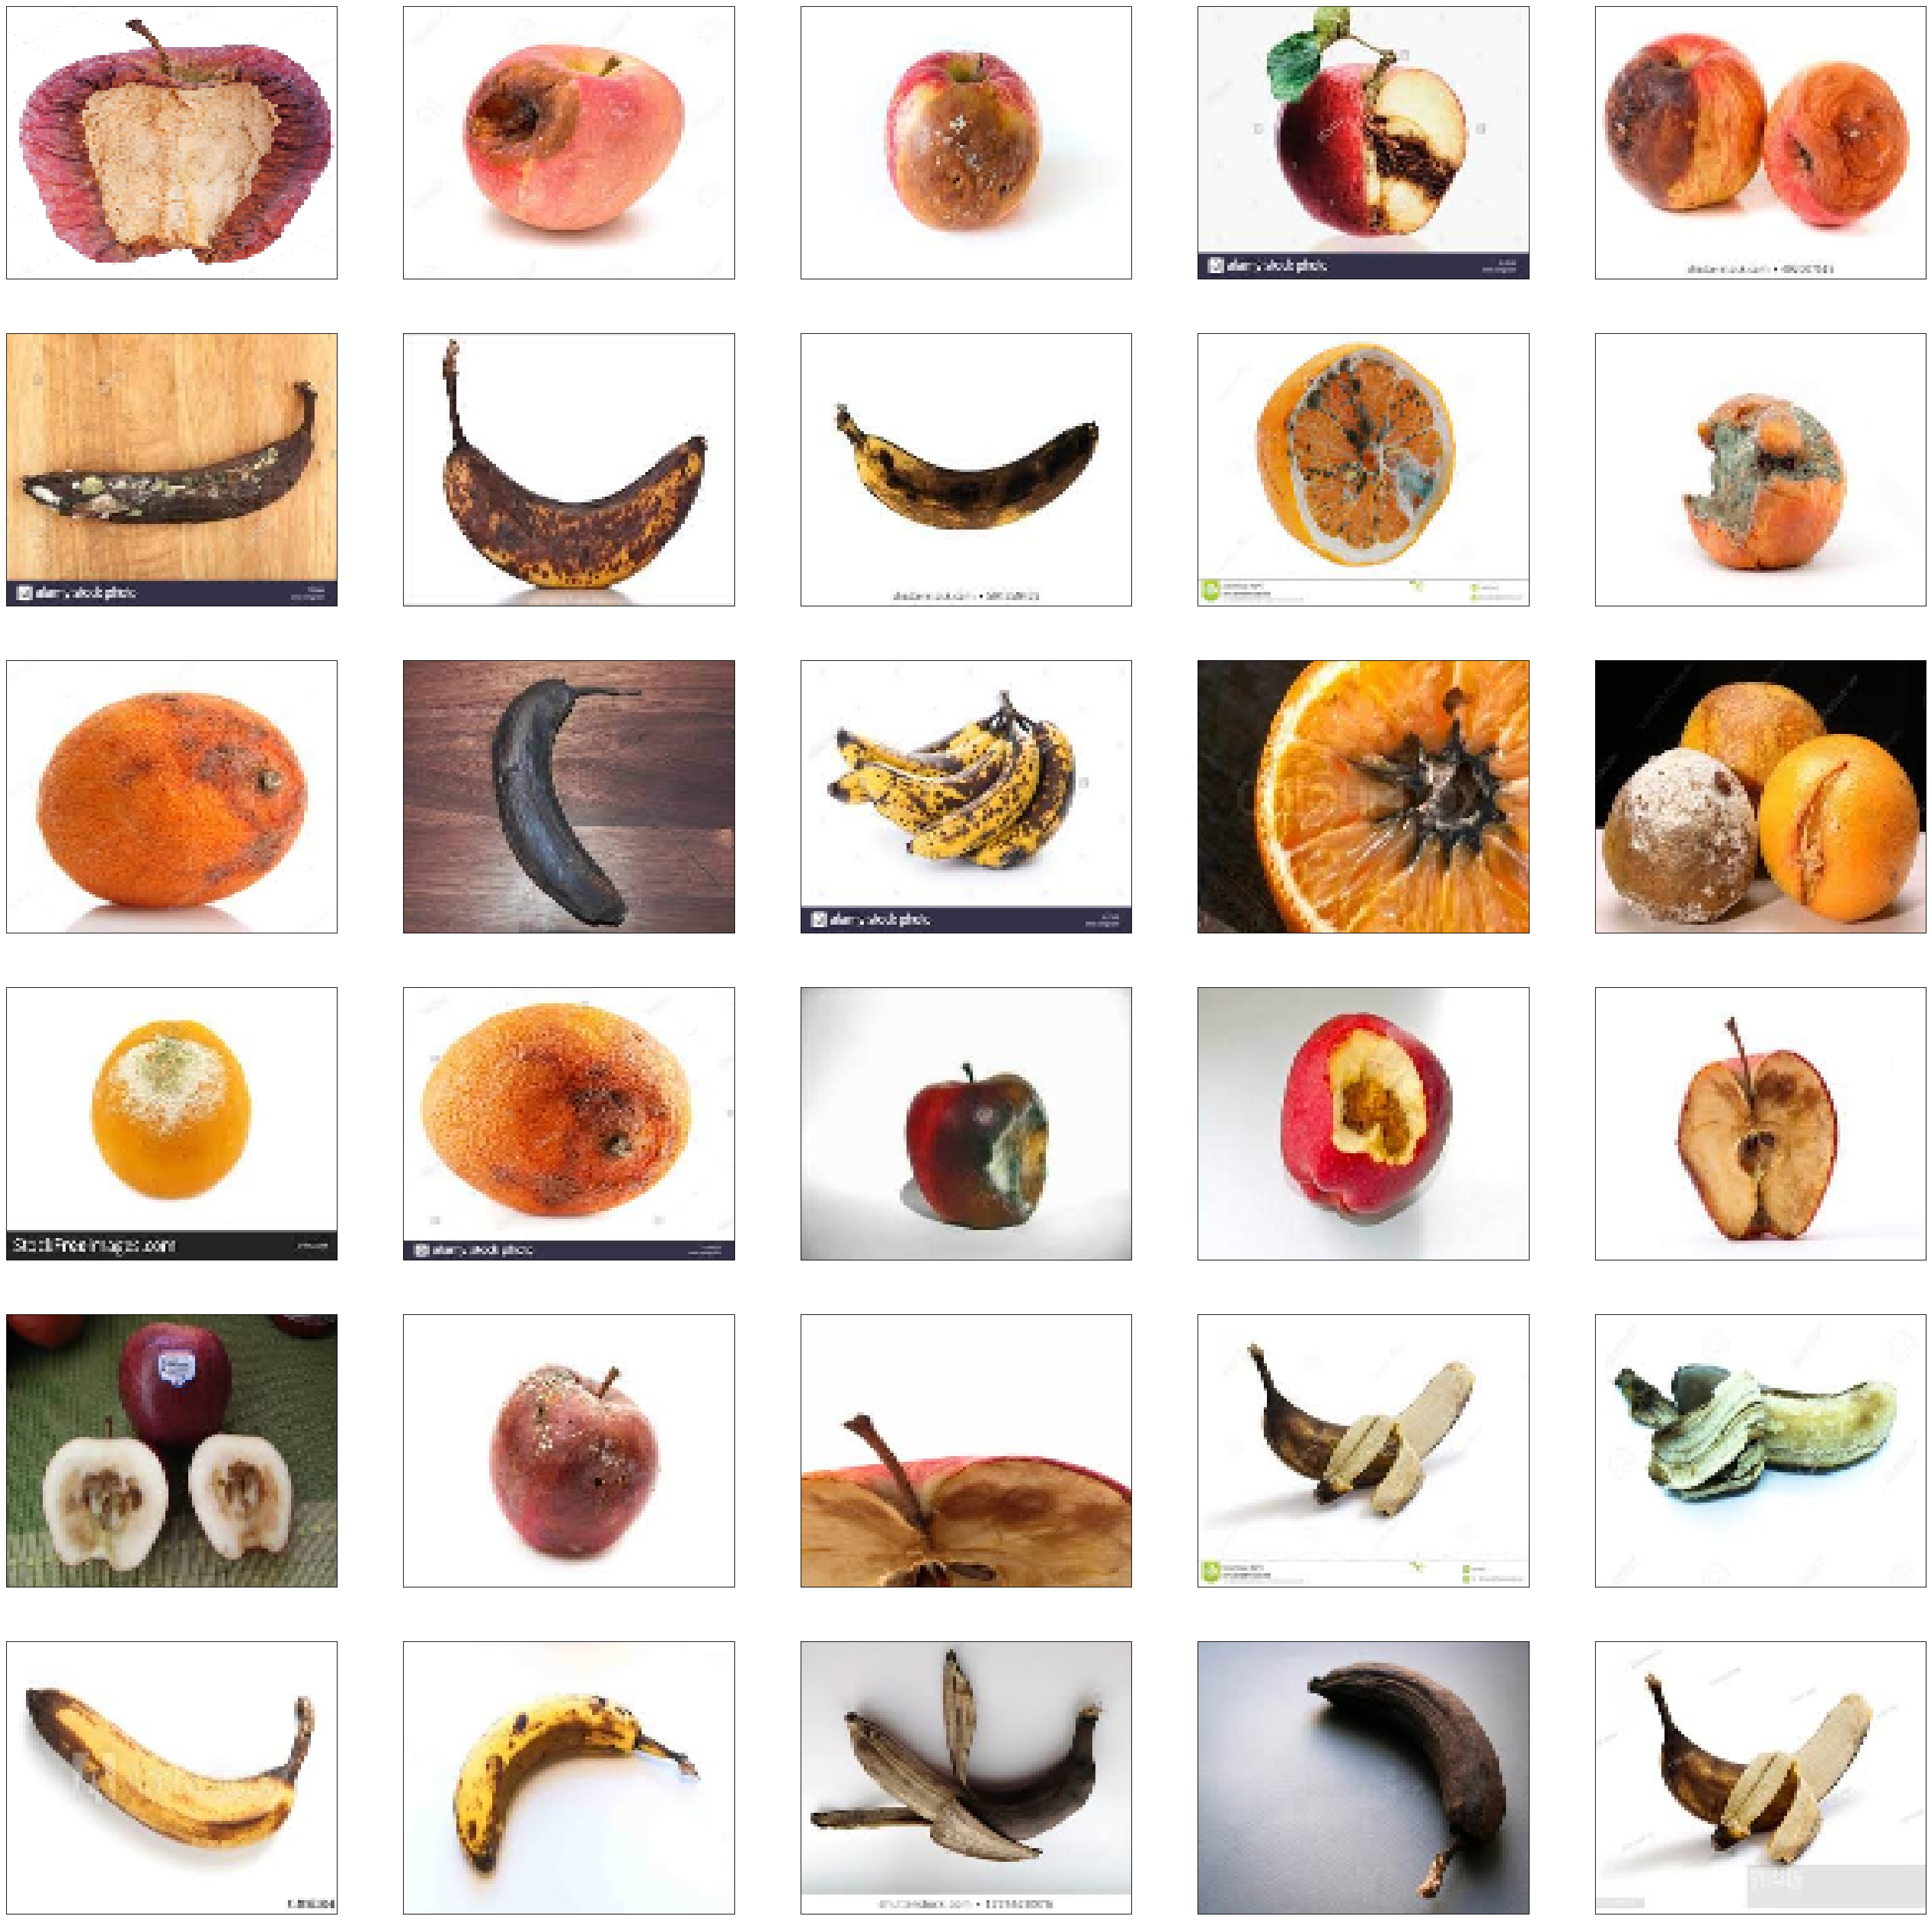

In [194]:
show_rand(os.listdir('data/quality/rotten')[:30],dir='data/quality/rotten')

In [195]:
import keras 
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout 

# Defining the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate the image by a random angle within the range of [-20, 20] degrees
    width_shift_range=0.2,  # Shift the image horizontally by a random fraction within the range of [-0.2, 0.2]
    height_shift_range=0.2,  # Shift the image vertically by a random fraction within the range of [-0.2, 0.2]
    shear_range=0.2,  # Apply shear transformation to the image by a random angle within the range of [-0.2, 0.2] degrees
    zoom_range=1.255,  # Zooming the image by a random factor within the range of [0.8, 1.2]
    horizontal_flip=True,  # Flipping the image horizontally
    vertical_flip=True,  # Flipping the image vertically
    validation_split=0.18  # Splitting the data into training and validation sets
)

train_generator_fruit = datagen.flow_from_directory(
    'data/Fruit_category',
    target_size=(100, 100),
    batch_size=20,
    class_mode='categorical',
    subset='training',
    shuffle=True  # Shuffle the data to avoid shape errors
)
validation_generator_fruit = datagen.flow_from_directory(
    'data/Fruit_category',
    target_size=(100, 100),
    batch_size=20,
    class_mode='categorical',
    subset='validation',
    shuffle=True  # Shuffle the data to avoid shape errors
)
train_generator_quality = datagen.flow_from_directory(
    'data/quality',
    target_size=(100, 100),
    batch_size=20,
    class_mode='binary',
    subset='training',
    shuffle=True  # Shuffle the data to avoid shape errors
)
validation_generator_quality = datagen.flow_from_directory(
    'data/quality',
    target_size=(100, 100),
    batch_size=20,
    class_mode='binary',
    shuffle=True  # Shuffle the data to avoid shape errors
)


Found 358 images belonging to 3 classes.
Found 77 images belonging to 3 classes.
Found 332 images belonging to 2 classes.
Found 403 images belonging to 2 classes.


In [196]:
train_generator_fruit.class_indices

{'apple': 0, 'banana': 1, 'orange': 2}

In [197]:
train_generator_quality.class_indices

{'Rotten': 0, 'fresh': 1}

In [198]:
import tensorflow as tf 
from tensorflow.keras import layers,models 
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input 
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [199]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Define the architecture of the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator_fruit,steps_per_epoch=len(train_generator_fruit),
          validation_data=validation_generator_fruit, validation_steps=len(validation_generator_fruit),
          epochs=100)

loss, accuracy = model.evaluate(validation_generator_fruit, steps=len(validation_generator_fruit))
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)
model.save('model.h5')


Epoch 1/100


18/18 [==============================] - 4s 146ms/step - loss: 45.8409 - accuracy: 0.2821 - val_loss: 1.2097 - val_accuracy: 0.3506
Epoch 2/100
18/18 [==============================] - 2s 128ms/step - loss: 0.9985 - accuracy: 0.4777 - val_loss: 0.8493 - val_accuracy: 0.5844
Epoch 3/100
18/18 [==============================] - 2s 125ms/step - loss: 0.8283 - accuracy: 0.6620 - val_loss: 0.6247 - val_accuracy: 0.7532
Epoch 4/100
18/18 [==============================] - 2s 124ms/step - loss: 0.6391 - accuracy: 0.7486 - val_loss: 0.5059 - val_accuracy: 0.7922
Epoch 5/100
18/18 [==============================] - 2s 122ms/step - loss: 0.7121 - accuracy: 0.7151 - val_loss: 0.5310 - val_accuracy: 0.8442
Epoch 6/100
18/18 [==============================] - 2s 124ms/step - loss: 0.5763 - accuracy: 0.8296 - val_loss: 0.6272 - val_accuracy: 0.7792
Epoch 7/100
18/18 [==============================] - 2s 122ms/step - loss: 0.5817 - accuracy: 0.7793 - val_loss: 0.4717 - val_accuracy: 0.8442
Epoch 8/10

c:\Users\ABHIRAM NAIDU\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [203]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Define the architecture of the model
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation='relu',input_shape=(100, 100, 3)))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(64, (3,3),activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, (3,3),activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model2.fit(train_generator_quality,steps_per_epoch=len(train_generator_quality),
          validation_data=validation_generator_quality, validation_steps=len(validation_generator_quality),
          epochs=100)

loss, accuracy = model2.evaluate(validation_generator_quality, steps=len(validation_generator_quality))
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)
model2.save('model2.h5')



Epoch 1/100
17/17 [==============================] - 4s 211ms/step - loss: 57.1280 - accuracy: 0.5000 - val_loss: 0.5862 - val_accuracy: 0.7122
Epoch 2/100
17/17 [==============================] - 3s 190ms/step - loss: 0.6690 - accuracy: 0.6416 - val_loss: 0.5807 - val_accuracy: 0.7320
Epoch 3/100
17/17 [==============================] - 3s 193ms/step - loss: 0.5865 - accuracy: 0.6867 - val_loss: 0.5870 - val_accuracy: 0.6998
Epoch 4/100
17/17 [==============================] - 3s 186ms/step - loss: 0.5761 - accuracy: 0.6898 - val_loss: 0.5658 - val_accuracy: 0.7122
Epoch 5/100
17/17 [==============================] - 3s 182ms/step - loss: 0.6046 - accuracy: 0.6958 - val_loss: 0.5868 - val_accuracy: 0.6799
Epoch 6/100
17/17 [==============================] - 3s 186ms/step - loss: 0.6029 - accuracy: 0.6355 - val_loss: 0.5714 - val_accuracy: 0.6700
Epoch 7/100
17/17 [==============================] - 3s 195ms/step - loss: 0.5657 - accuracy: 0.6898 - val_loss: 0.5949 - val_accuracy: 0.647

c:\Users\ABHIRAM NAIDU\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
